In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
%matplotlib inline

In [107]:
from google.colab import files
uploaded = files.upload()

Saving Airlines+Data.xlsx to Airlines+Data (2).xlsx


In [108]:
import pandas as pd
df = pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True)
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [109]:
df.isnull().sum()

Passengers    0
dtype: int64

In [110]:
df.shape

(96, 1)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [112]:
df[df.duplicated()].shape

(16, 1)

In [113]:
df.drop_duplicates(inplace=True)

In [114]:
df.describe()

,Passengers
count,80.000000
mean,215.975000
std,75.588489
min,104.000000
25%,149.750000
50%,202.000000
75%,270.250000
max,413.000000


<ipython-input-115-9569e7af08fb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})


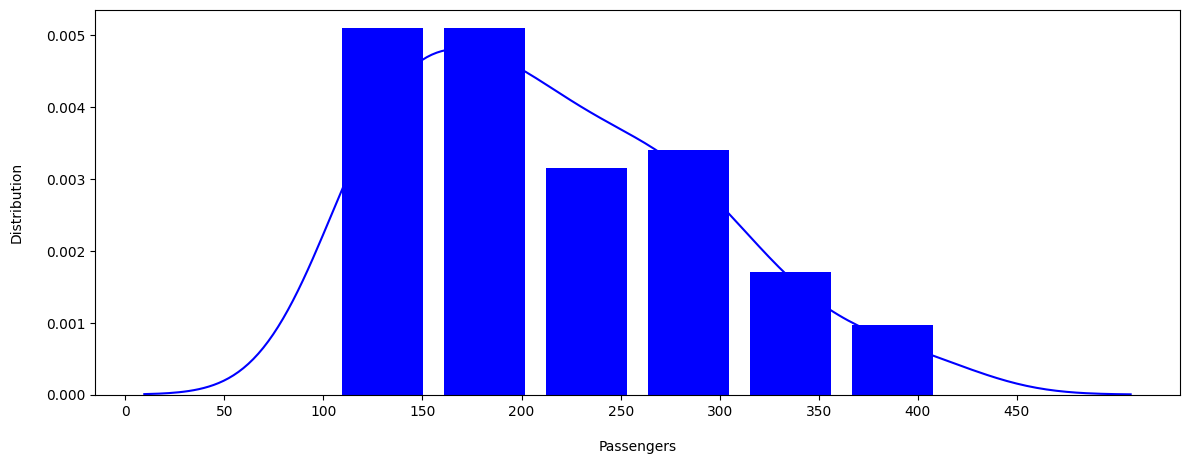

In [115]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def distplot(param):
    plt.figure(figsize=(14,5))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,500,50))
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Passengers")

In [116]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['Passengers'], dtype='object')

<ipython-input-117-9491e4da7213>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)


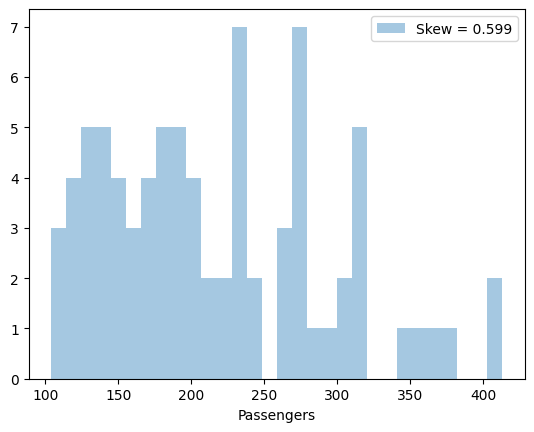

In [117]:
for i in numerical_features:
    skew = df[i].skew()
    sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

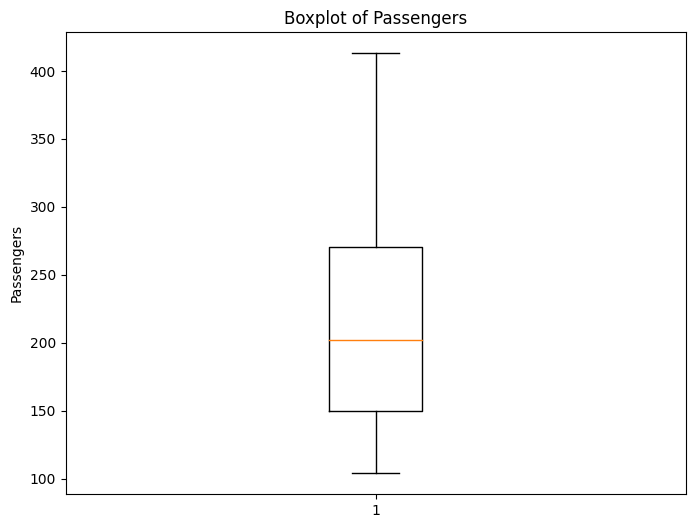

In [118]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Passengers'])
plt.title('Boxplot of Passengers')
plt.ylabel('Passengers')
plt.show()

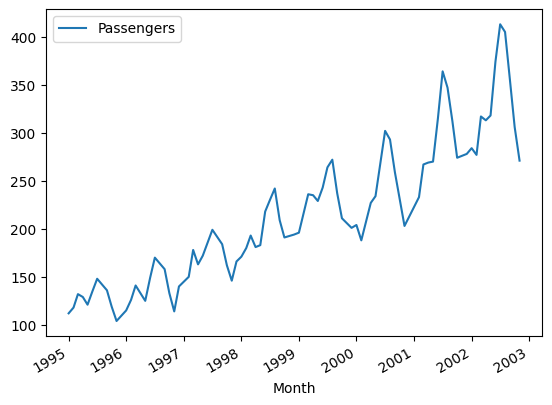

In [119]:
df.plot()
plt.show()

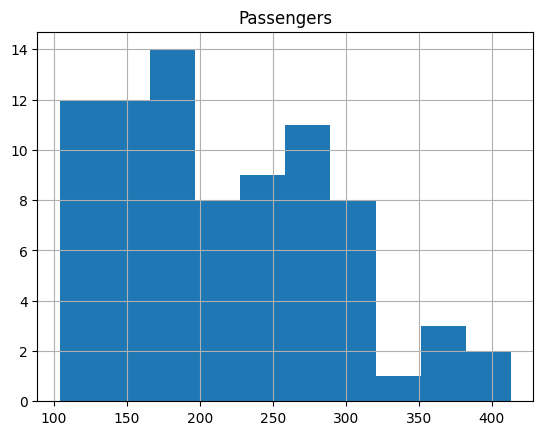

In [120]:
df.hist()
plt.show()

In [121]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
df = pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)
groups = df.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
  years[name.year] = group.values
years

<ipython-input-121-bf3715021a09>:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)


,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


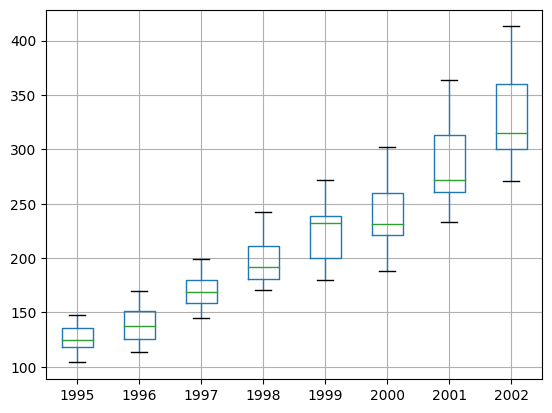

In [123]:
years.boxplot()
plt.show()

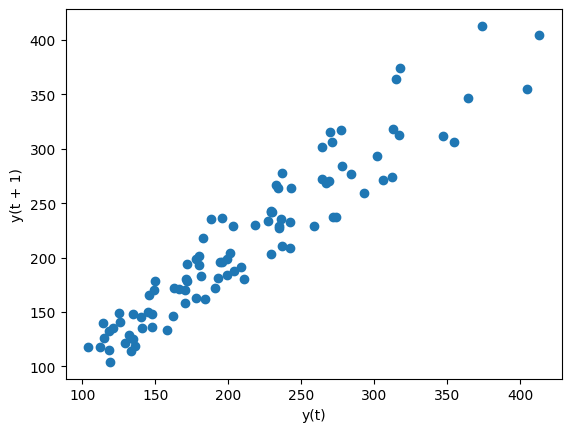

In [124]:
from pandas.plotting import lag_plot
df = pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True)
lag_plot(df)
plt.show()

In [125]:
data = pd.read_excel('Airlines+Data.xlsx')
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [126]:
data["month"] = data.Month.dt.strftime("%b")
data["year"] = data.Month.dt.strftime("%Y")
data.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


<Axes: xlabel='year', ylabel='Passengers'>

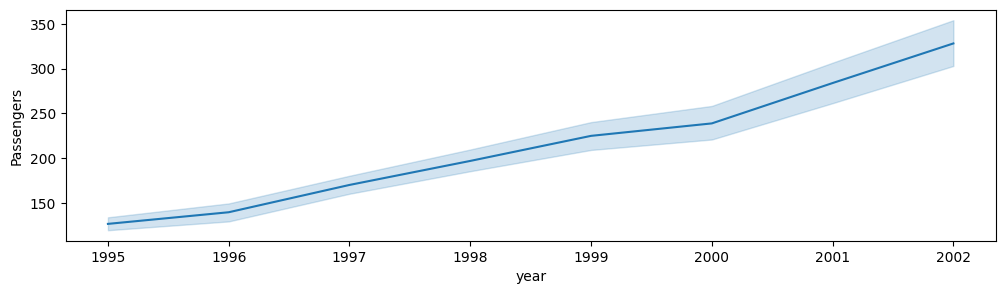

In [127]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data)

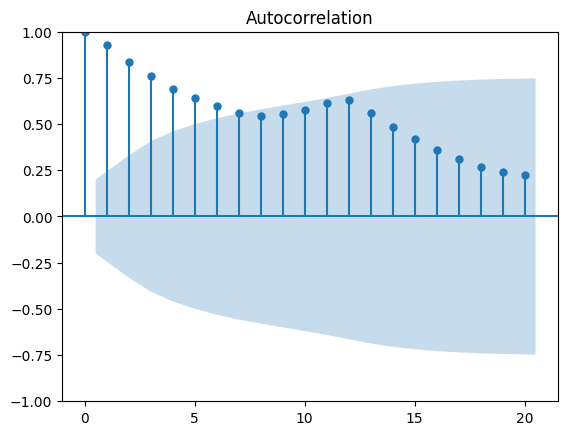

In [128]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(data["Passengers"])

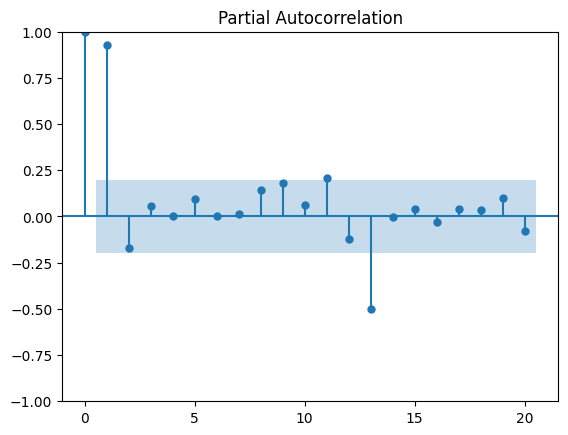

In [129]:
pacf = plot_pacf(data["Passengers"])

In [130]:
data.shape

(96, 4)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   month       96 non-null     object        
 3   year        96 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.1+ KB


In [132]:
data['year'] = data['year'].astype("int64")

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   month       96 non-null     object        
 3   year        96 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.1+ KB


In [134]:
data = pd.get_dummies(data)
data

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [135]:
x=np.arange(1,97)

In [136]:
data['t'] = pd.Series(data=x)

In [137]:
data['t_sqr'] = pd.Series(data=(x*x))

In [138]:
data['log_passengers'] = np.log(data['Passengers'])

In [139]:
data.head()

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_sqr,log_passengers
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [140]:
Train = data.head(84)
Test = data.tail(12)

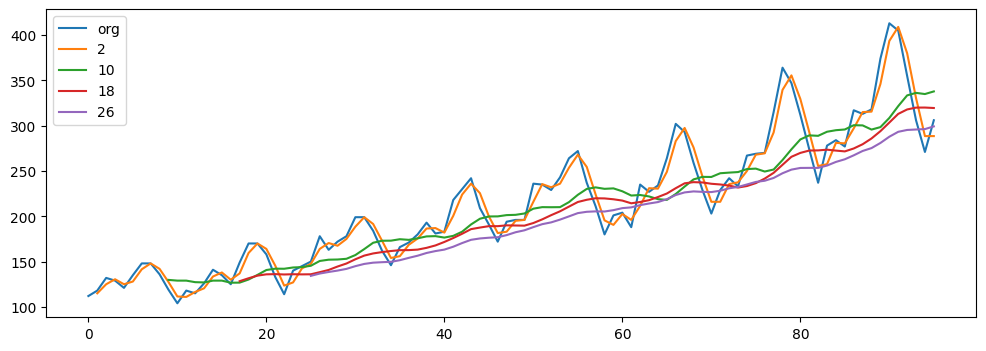

In [141]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,30,8):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

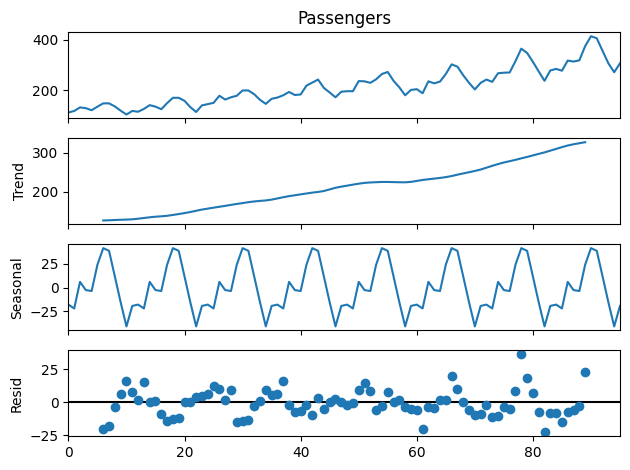

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [143]:
def MAPE(pred,org):
  data = np.abs((pred-org)/org)*100
  return np.mean(data)

In [144]:
df1 = pd.DataFrame()
df1['Month'] = data['Month']
df1['Passengers'] = data['Passengers']
weights = np.array([0.1,0.2,0.3,0.4])
df1['WMA'] = data['Passengers'].rolling(4).apply(lambda x: np.sum(weights*x))
df1

,Month,Passengers,WMA
0,1995-01-01,112,NaN
1,1995-02-01,118,NaN
2,1995-03-01,132,NaN
3,1995-04-01,129,126.0
4,1995-05-01,121,125.3
...,...,...,...
91,2002-08-01,405,392.5
92,2002-09-01,355,383.5
93,2002-10-01,306,351.2
94,2002-11-01,271,311.7


In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

**Simple Exponential Method**

In [146]:
ses_model = SimpleExpSmoothing(Train['Passengers']).fit(smoothing_level=1)
pred_ses = ses_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test.Passengers)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


14.235433039401634

**Holt Method**

In [147]:
hw_model = Holt(Train['Passengers']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

<ipython-input-147-280d99048069>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train['Passengers']).fit(smoothing_level=0.8, smoothing_slope=0.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


23.530719644076488

**Holts winter exponential smoothing with additive seasonality and additive trend**

In [148]:
hwe_model_add_add = ExponentialSmoothing(Train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

5.730704946852847

**Holts winter exponential smoothing with multiplicative seasonality and additive trend**

In [149]:
hwe_model_mul_add = ExponentialSmoothing(Train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.821093186644687

**Final Model by combaining train and test**

In [150]:
hwe_model_add_add = ExponentialSmoothing(data['Passengers'],seasonal='add',trend='add',seasonal_periods=12).fit()

In [151]:
hwe_model_add_add.forecast(10)

96     319.235270
97     311.528386
98     350.278691
99     346.984976
100    351.845022
101    403.925707
102    440.566797
103    427.446477
104    376.628169
105    329.767502
dtype: float64